In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
calc=np.load('calc_data_X.npy')
mass=np.load('mass_data_X.npy')

print(len(calc),len(mass))

1545 1316


In [3]:
mass.shape

(1316, 224, 224, 3)

In [11]:
# Load Dataframe from .csv
calc_train = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
calc_test = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
mass_train = pd.read_csv(("mass_case_description_train_set.csv"), index_col=0)
mass_test = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

calc_y=calc_train['pathology']
calc_y=calc_y[1:]
calc_y[calc_y == 'calc_BENIGN_WITHOUT_CALLBACK'] = "calc_BENIGN"

mass_y=np.load('mass_train_label.npy')
mass_y[mass_y == 'mass_CALLBACK'] = "mass_BENIGN"

print(len(calc_y),len(mass_y))

1545 1316


In [12]:
calc_y.unique()

array(['calc_MALIGNANT', 'calc_BENIGN'], dtype=object)

In [31]:
mass_y

patient_id
P_00001    mass_MALIGNANT
P_00001    mass_MALIGNANT
P_00004       mass_BENIGN
P_00004       mass_BENIGN
P_00004       mass_BENIGN
                ...      
P_02033    mass_MALIGNANT
P_02079    mass_MALIGNANT
P_02079    mass_MALIGNANT
P_02092    mass_MALIGNANT
P_02092    mass_MALIGNANT
Name: pathology, Length: 1318, dtype: object

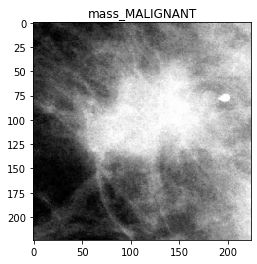

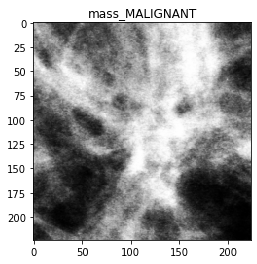

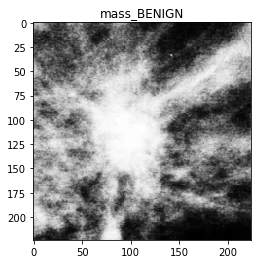

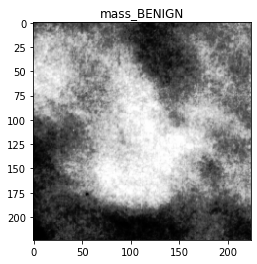

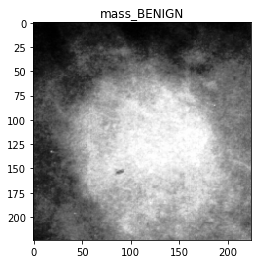

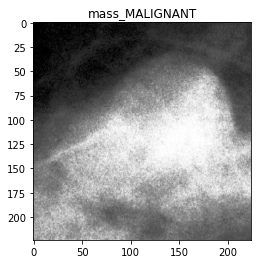

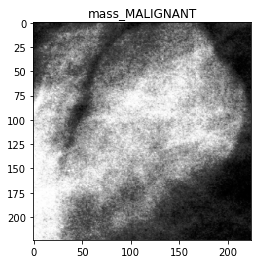

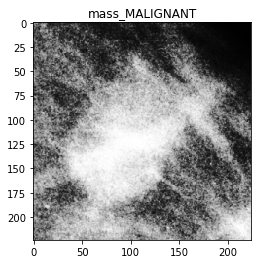

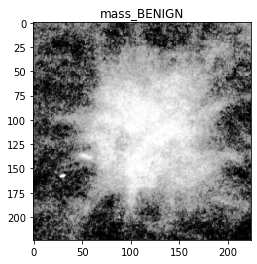

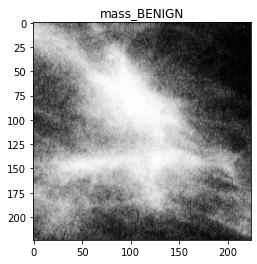

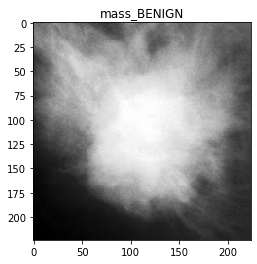

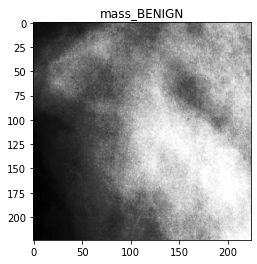

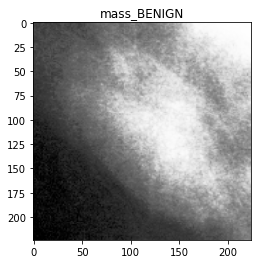

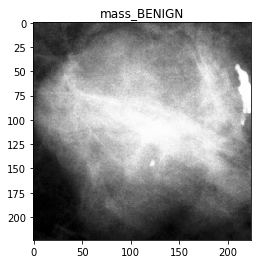

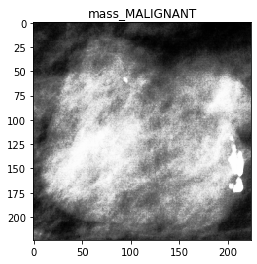

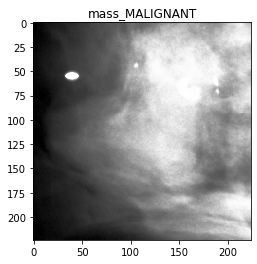

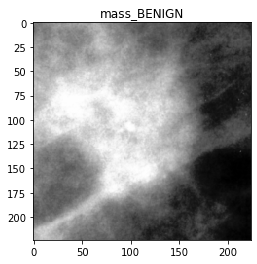

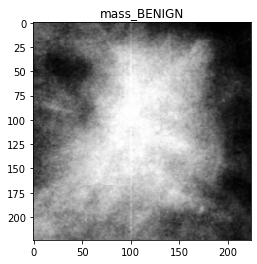

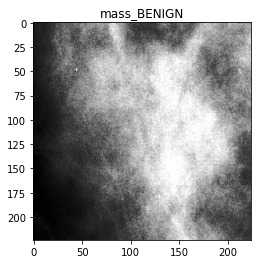

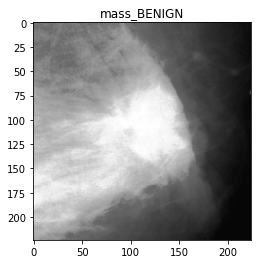

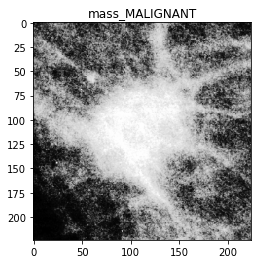

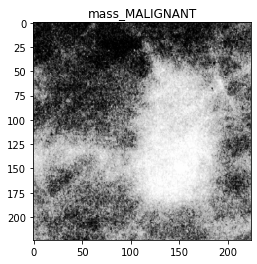

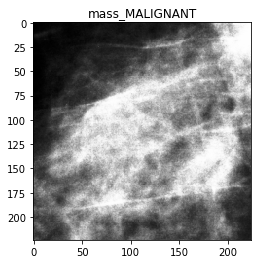

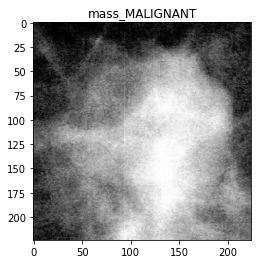

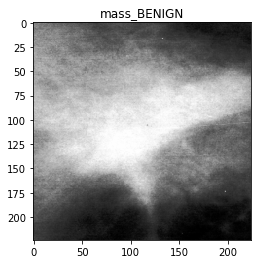

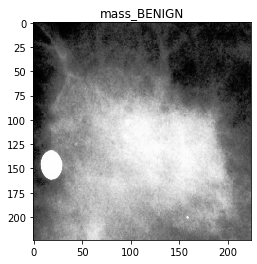

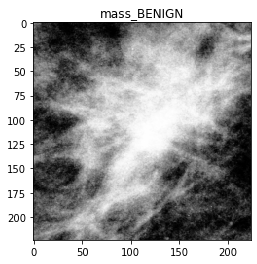

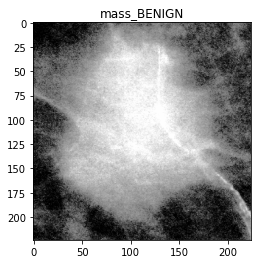

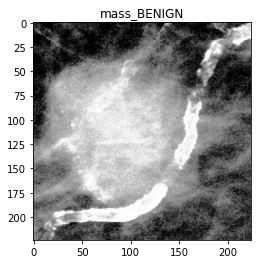

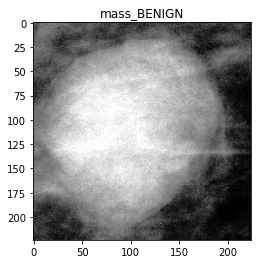

In [32]:
for i in range(30):
    plt.imshow(mass[i])
    plt.title(mass_y[i])
    plt.show()

In [48]:
#data=np.concatenate((calc,mass))
data_y=np.concatenate((calc_y,mass_y))

In [50]:
len(data)

2861

In [8]:
data_y.shape

(704,)

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(data_y)
encoded_Y = encoder.transform(data_y)
one_hot_y = np_utils.to_categorical(encoded_Y)

data_y=one_hot_y #BENIGN, BENIGN_WITHOUT_CALLBACK,MALIGNANT순

Using TensorFlow backend.


In [10]:
data_y.shape #calc_BENIGN, calc_MALIGNANT, mass_BENIGN, mass_MALIGNANT

(704, 4)

In [53]:
#np.save('data_X.npy',data)
np.save('data_y.npy',data_y)

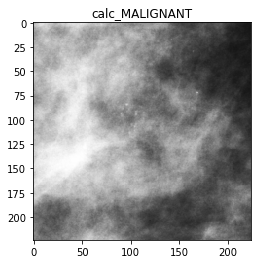

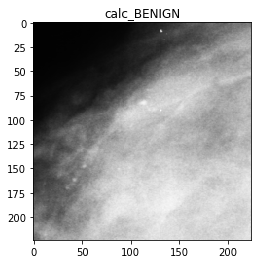

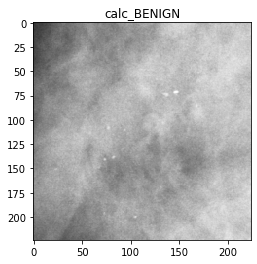

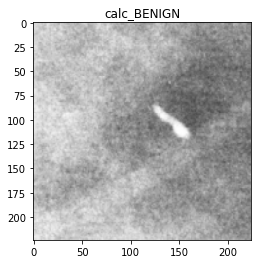

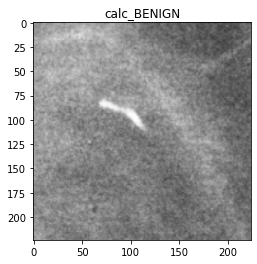

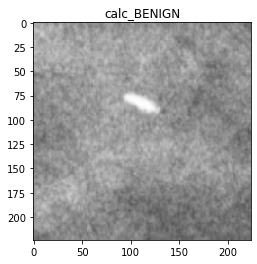

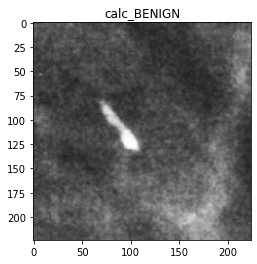

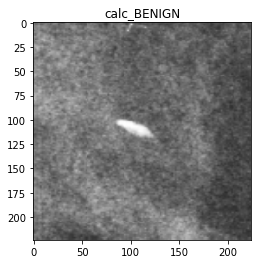

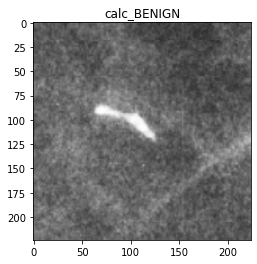

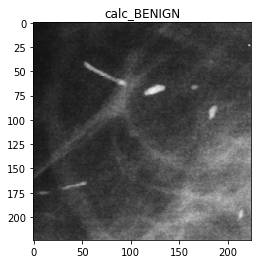

In [54]:
for i in range(10):
    plt.imshow(data[i])
    plt.title(data_y[i])
    plt.show()

In [58]:
len(data)
len(data_y)

2861